In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib


In [2]:
df_raw = pd.read_csv("Telemarketing_Data_cl4.csv", encoding='utf-8-sig' )
df_raw.head()

,연령,age_group,new_age_group,직업군,economic_group,economic_group_dummy,결혼여부,학력,신용카드소지여부,주택대출여부,...,통화시간,연락시도횟수,p_days,과거통화횟수,계약여부,success,success.1,연락일자,카드종류,card_category
0,56,5,50_group,주부,0,no,결혼,중졸,없음,없음,...,261,1,NaN,0,no,0,0,2018-01-03,87,life
1,57,5,50_group,서비스종사자,1,yes,결혼,전문학교,미확인,없음,...,149,1,NaN,0,no,0,0,2018-01-03,88,life
2,37,3,30_group,서비스종사자,1,yes,결혼,전문학교,없음,대출있음,...,226,1,NaN,0,no,0,0,2018-01-03,89,life
3,40,4,40_group,회사원,1,yes,결혼,검정고시,없음,없음,...,151,1,NaN,0,no,0,0,2018-01-03,90,life
4,56,5,50_group,서비스종사자,1,yes,결혼,전문학교,없음,없음,...,307,1,NaN,0,no,0,0,2018-01-03,91,life


count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: 통화시간, dtype: float64


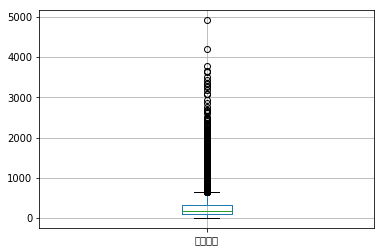

In [3]:
a = df_raw["통화시간"]
print(a.describe())
a = pd.DataFrame(a)
a.boxplot()

In [4]:
b = df_raw["과거통화횟수"]
b.describe()

count    41188.000000
mean         0.172963
std          0.494901
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: 과거통화횟수, dtype: float64

In [5]:
df_raw["직업군"].unique()

array(['주부', '서비스종사자', '회사원', '산업노동자', '기술자', '은퇴', '공무원', '미취업자', '자영업자',
       '미확인', '기업가', '학생'], dtype=object)

In [6]:
len(df_raw["직업군"].unique())

12

In [7]:
df_raw["contact"].unique()

array(['유선전화', '휴대폰'], dtype=object)

In [8]:
df_raw["age_group"].unique()

array([5, 3, 4, 2, 6, 1, 7, 8, 9], dtype=int64)

In [9]:
df_raw["학력"].unique()

array(['중졸', '전문학교', '검정고시', '고졸', '석박사', '미확인', '대졸학사', '문맹'],
      dtype=object)

In [ ]:
# 선택
과거통화횟수 # 1 ~ 7
직업군 # 1 2개
contact # 2개
age_group # 1020, 30, 40, 50, 60, 70, 80, 90
학력 ## 8개

In [11]:
df_raw["과거통화횟수"].unique()

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [12]:
df_raw["계약여부"].unique()

array(['no', 'yes'], dtype=object)

In [5]:
df_tabe_phone = df_raw.groupby(["과거통화횟수"]) ["success"].sum()
df_tabe_phone

과거통화횟수
0    3141
1     967
2     350
3     128
4      38
5      13
6       3
7       0
Name: success, dtype: int64

In [18]:
grouped = df_raw['success'].groupby(df_raw['과거통화횟수'])

In [24]:
df_tabe_phone = df_raw.groupby(["과거통화횟수"]) ["success"].sum()
grouped = df_raw['success'].groupby(df_raw['과거통화횟수'])
df_tabe_phone["succes"] = grouped.sum() / grouped.size()
df_tabe_phone["failure"] = 1 - grouped.sum() / grouped.size()

In [45]:
df_tabe_job = df_raw.groupby(["직업군"]) ["success"].sum()
grouped_job = df_raw['success'].groupby(df_raw['직업군'])
df_tabe_job["succes"] = grouped_job.sum() / grouped_job.size()
df_tabe_job["failure"] = 1 - grouped_job.sum() / grouped_job.size()

In [49]:
df_tabe_contact = df_raw.groupby(["contact"]) ["success"].sum()
grouped_contact = df_raw['success'].groupby(df_raw['contact'])
df_tabe_contact["succes"] = grouped_contact.sum() / grouped_contact.size()
df_tabe_contact["failure"] = 1 - grouped_contact.sum() / grouped_contact.size()

In [50]:
df_tabe_age_group = df_raw.groupby(["new_age_group"]) ["success"].sum()
grouped_age_group = df_raw['success'].groupby(df_raw['new_age_group'])
df_tabe_age_group["succes"] = grouped_age_group.sum() / grouped_age_group.size()
df_tabe_age_group["failure"] = 1 - grouped_age_group.sum() / grouped_age_group.size()

In [54]:
df_tabe_age_edu = df_raw.groupby(["학력"]) ["success"].sum()
grouped_age_edu = df_raw['success'].groupby(df_raw['학력'])
df_tabe_age_edu["succes"] = grouped_age_edu.sum() / grouped_age_edu.size()
df_tabe_age_edu["failure"] = 1 - grouped_age_edu.sum() / grouped_age_edu.size()

In [ ]:
grouped_success

In [112]:
succes_rate = len(df_raw[df_raw['success']==1]) / len(df_raw)
fail_rate = 1 - len(df_raw[df_raw['success']==1]) / len(df_raw)

In [113]:
a = int(input("과거통화횟수를 입력하시오: "))
b = input("직업군을 입력하시오: ex) 주부, 서비스종사자, 회사원, 산업노동자, 기술자, 은퇴, 공무원, 미취업자, 자영업자, 미확인, 기업가, 학생")
c = input("유선 여부를 입력하시오: ex(유선전화,휴대폰) ")
d = input("연령대를 입력하시오: ex(1020_group, 30_group, 40_group, 50_group, 60_group, 70_group, 80_group, 90_group) ")
e = input("학력을 입력하시오 ex) 중졸, 전문학교, 검정고시, 고졸, 석박사, 미확인, 대졸학사, 문맹")

과거통화횟수를 입력하시오: 1
직업군을 입력하시오: ex) 주부, 서비스종사자, 회사원, 산업노동자, 기술자, 은퇴, 공무원, 미취업자, 자영업자, 미확인, 기업가, 학생회사원
유선 여부를 입력하시오: ex(유선전화,휴대폰) 휴대폰
연령대를 입력하시오: ex(1020_group, 30_group, 40_group, 50_group, 60_group, 70_group, 80_group, 90_group) 1020_group
학력을 입력하시오 ex) 중졸, 전문학교, 검정고시, 고졸, 석박사, 미확인, 대졸학사, 문맹대졸학사


In [115]:
pro = df_tabe_phone["succes"][a] * df_tabe_job["succes"][b] *df_tabe_contact["succes"][c] * df_tabe_age_group["succes"][d] * df_tabe_age_edu["succes"][e] * succes_rate
pro

1.0192671074826296e-05